# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 7 Exercise </center>

# <center>DBSCAN Clustering and K Mean Clustering</center>


#  Clustering using Wine Quality Dataset


dataset :  https://archive.ics.uci.edu/ml/datasets/wine+quality 



**Attribute Information:**

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - color ("white" or "red")

Output variable (based on sensory data):

13 - quality (score between 0 and 10)

# PART A: KMeans

# Import Libraries

In [2]:
#import all the required libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data and Data Manipulation with pandas

In [3]:
#load data from the csv file
df = pd.read_csv('winequality.csv')
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,white
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,white
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,white
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,white
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
3194,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
3195,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
3196,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [4]:
#Depending on your clustering purspose you may wish to drop the column that is your target
# drop your target here
df.drop(['quality'], axis=1, inplace=True)


In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,white
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,white
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,white
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,white
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,white
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,red
3194,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,red
3195,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,red
3196,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,red


# 2. Data Exploration and Visualization

INSTRUCTIONS:

1. Check datatypes of your features. If they are not in required format, perform type conversion.


2. Note that there is a categorical data. We can label encode it or simply use a replacement.


3. Use appropriate visualization tools/graph to explore your data more.


In [6]:
#check data types hrere
df.dtypes



fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
color                    object
dtype: object

In [7]:
#encode your categorical features here
cdf=df.select_dtypes(['object'])
cdf



,color
0,white
1,white
2,white
3,white
4,white
...,...
3193,red
3194,red
3195,red
3196,red


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['color'] = le.fit_transform(df.color)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


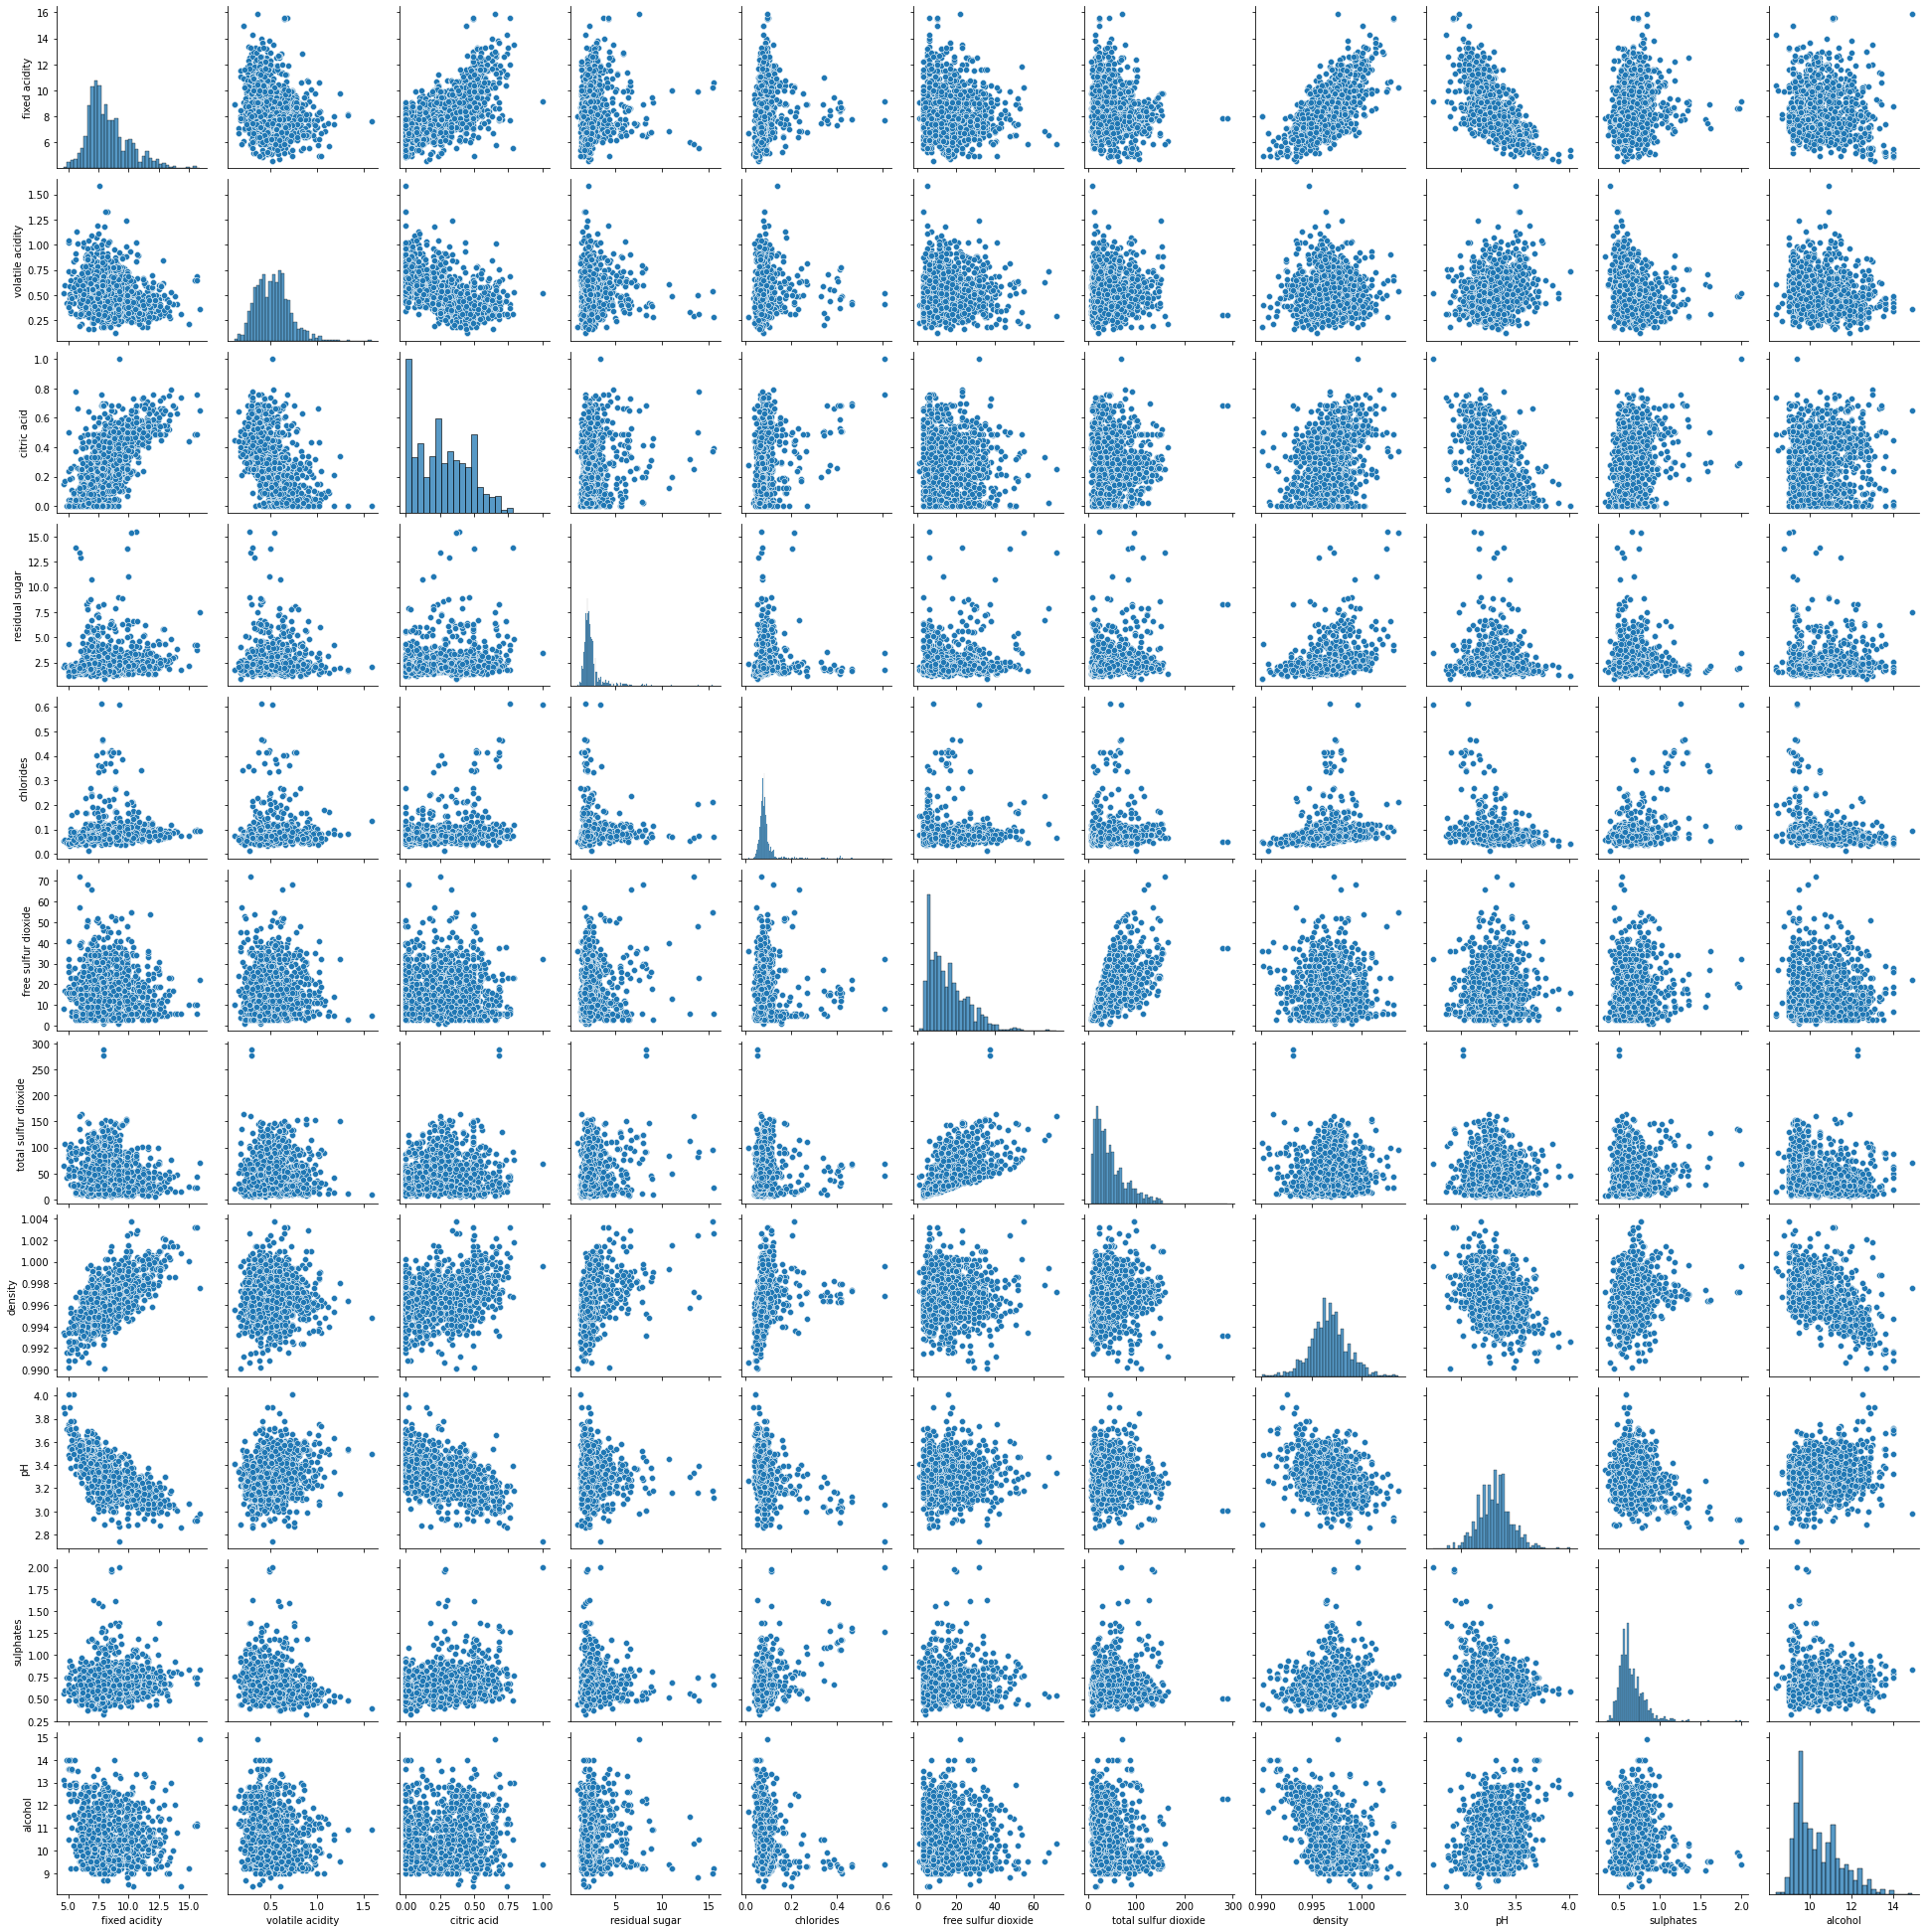

In [10]:
sns.pairplot(df)
plt.show()

# 3. Training Kmean Model

In [13]:
#create kmean model
#create kmean model
from sklearn.cluster import KMeans
X = df
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans

categories = kmeans.predict(X)

plt.scatter(X['alcohol'],X['fixed acidity'], c=colormap[categories])
plt.show()



NameError: name 'colormap' is not defined

# 4. Choosing best value of K

In [8]:
#use Elbow method to find best K value for Kmean model



# 5. Evaluating Clustering models

**Many evaluation metrics have been used in supervised learning to assess the performance of our predictive models. Similar to this, you could also be interested in how effective your clustering models are. You might also be interested in learning how to evaluate how well clustering models fit data. Despite the fact that we lack the outputs needed to compare our results to those of supervised models, we do have some measurement scores that can be used to assess how well unsupervised models perform. The most popular is the `silhouette score or coefficient`.**

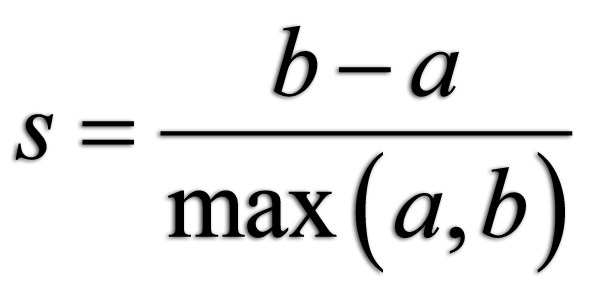

**The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.**

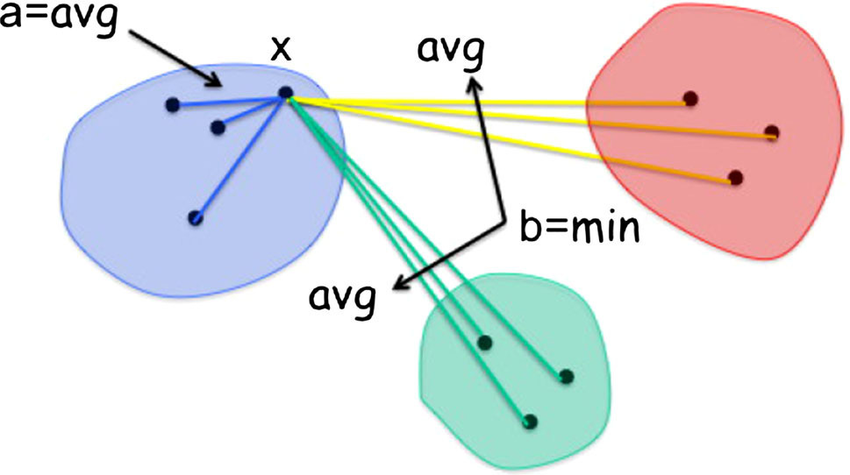

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

`sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)`

In [9]:
#Evaluate your Kmean model using silhouette score with K value chosen from Elbow method in earlier steps




# 6. Choosing K value with Silhouette Score


**- We can also use Silhouette score to choose best value of K. From range of k values, choose K value that gives highest silhouette score**


In [10]:
#Write your solution here. What is the best value of K ?





# PART B: DBSCAN

# 7. Training DBSCAN Model

In [11]:
#Train your DBSCAN model here




# 8. Evaluating DBSCAN Model

In [12]:
#Check performance of your model.



